In [193]:
from __future__ import print_function
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
%matplotlib inline  

In [194]:
INPUT_SIZE = 1
OUTPUT_SIZE = 1
a = -0.4
b = 1.5

In [195]:
x = np.random.rand(100)
y = a * x + b

In [196]:
x_tensor = Variable(torch.Tensor(x), requires_grad=False)
y_tensor = Variable(torch.Tensor(y), requires_grad=False)

In [197]:
output = nn.Linear(INPUT_SIZE, OUTPUT_SIZE)

In [198]:
model_a = Variable(torch.ones(1), requires_grad=True)
model_b = Variable(torch.ones(1), requires_grad=True)

In [199]:
learning_rate = 1e-2
optimizer = torch.optim.Adam([model_a, model_b], lr=learning_rate)
loss_fn = nn.MSELoss()

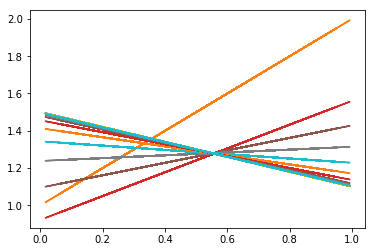

loss: 3.2502407520951238e-06


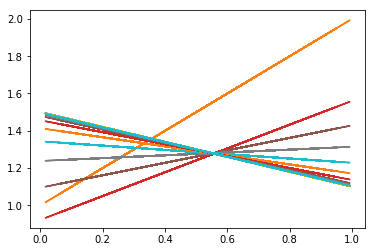

In [200]:
for i in range(500):
    model_y = model_a * x_tensor + model_b 
    loss = loss_fn(model_y, y_tensor)
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()
    #time.sleep(0.001)
    if i % 50 == 0:
        plt.plot(x, y, x, model_y.data.numpy())
        display.clear_output(wait=True)
        display.display(plt.gcf())
        print("loss: {}".format(loss.data.numpy()[0]))
        time.sleep(1)